In [1]:
# Import dependencies

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# for ML
from sklearn.model_selection import train_test_split

# for preprocessing
from sklearn.preprocessing import StandardScaler

# for cluster analysis
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

# for PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# for making choropleth graph
import plotly.express as px
import plotly.graph_objects as go

from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline

In [2]:
df = pd.read_csv('UsArrests.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [3]:
# checking city column for unexpected/missing values and any misspellings
city_un = df['City'].unique()
city_un.sort()
city_un

# there don't appear to be any missing values for the city column

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [4]:
# checking murder column for unexpected values
murd_un = df['Murder'].unique()
murd_un.sort()
murd_un

# there are no unexpected values, including no 0's, so nothing to change here

array([ 0.8,  2.1,  2.2,  2.6,  2.7,  3.2,  3.3,  3.4,  3.8,  4. ,  4.3,
        4.4,  4.9,  5.3,  5.7,  5.9,  6. ,  6.3,  6.6,  6.8,  7.2,  7.3,
        7.4,  7.9,  8.1,  8.5,  8.8,  9. ,  9.7, 10. , 10.4, 11.1, 11.3,
       11.4, 12.1, 12.2, 12.7, 13. , 13.2, 14.4, 15.4, 16.1, 17.4])

In [5]:
# checking assault column, same as above
ass_un = df['Assault'].unique()
ass_un.sort()
ass_un

# same conclusion as above there are no unexpected values, including no 0's, so nothing to change here

array([ 45,  46,  48,  53,  56,  57,  72,  81,  83,  86, 102, 106, 109,
       110, 113, 115, 120, 145, 149, 151, 156, 159, 161, 174, 178, 188,
       190, 201, 204, 211, 236, 238, 249, 252, 254, 255, 259, 263, 276,
       279, 285, 294, 300, 335, 337], dtype=int64)

In [6]:
# same as above
urb_un = df['UrbanPop'].unique()
urb_un.sort()
urb_un

#there are no unexpected values, including no 0's, so nothing to change here

array([32, 39, 44, 45, 48, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 62, 63,
       65, 66, 67, 68, 70, 72, 73, 74, 75, 77, 78, 80, 81, 83, 85, 86, 87,
       89, 91], dtype=int64)

In [7]:
# same as above
rap_un = df['Rape'].unique()
rap_un.sort()
rap_un

# same conclusion as above

array([ 7.3,  7.8,  8.3,  9.3,  9.5, 10.8, 11.1, 11.2, 11.3, 12.8, 14.2,
       14.9, 15.6, 15.8, 16.1, 16.3, 16.4, 16.5, 17.1, 18. , 18.8, 19.5,
       20. , 20.2, 20.7, 21. , 21.2, 21.4, 22.2, 22.5, 22.9, 24. , 25.5,
       25.8, 26.1, 26.2, 26.9, 27.8, 28.2, 29.3, 31. , 31.9, 32.1, 35.1,
       38.7, 40.6, 44.5, 46. ])

# Duplicate Rows

Although there are 50 states ('cities' means 'states' here) and 50 rows it's unlikely that there are any duplicate rows, but worth checking anyway.

In [8]:
# printing any duplicate rows
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")

duplicate

# as anticipated, there are no duplicate rows in this df

Duplicate Rows :


,City,Murder,Assault,UrbanPop,Rape


# Changing Dtypes

'City' is in an object dtypes so I'm going to change this to string. I am also going to change the name of this column to 'State' as it has been misnamed in this df, and the change helps me keep in mind what I'm measuring.

In [9]:
# changing dtype to string
df['City'] = df['City'].astype('string')

# checking change worked
print(type(df['City'][0]))

# it did work

<class 'str'>


In [10]:
# renaming 'City' column
df = df.rename(columns={'City': 'State'})

#checking this worked
df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# Data Distribution and Outliers

Below I'm going to get some basic information about the data and check for outliers using boxplots

In [11]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


This dataset is looking at arrests per 100,000 residents, and 'UrbanPop' is the percent of the population living in Urban areas.

A look at very basic descriptive statistics tells us that the highest arrest rate for a crime is for assault (which is considerably higher than the others), followed by rape and murder. A high std deviation for assault denotes high variation in the dataset for thei variable, and a low std deviation for murder denotes much less variation. All of this consistent with how I would assume the data to look, so I'm not concerned at this point with using the dataset or the need to clean it further.

{'whiskers': [<matplotlib.lines.Line2D at 0x27b92023160>,
 'caps': [<matplotlib.lines.Line2D at 0x27b920236a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27b92022ec0>],
 'medians': [<matplotlib.lines.Line2D at 0x27b92023be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27b92023e80>],
 'means': []}

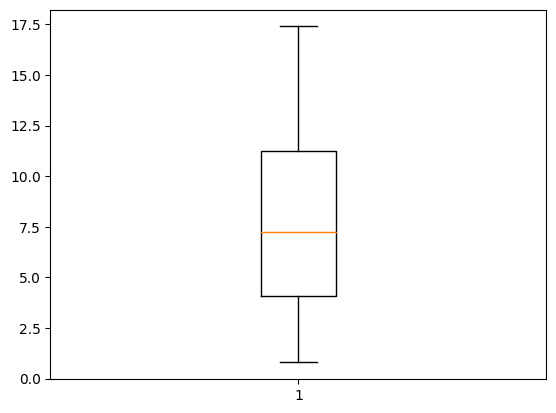

In [12]:
x = df['Murder']
plt.boxplot(x)

{'whiskers': [<matplotlib.lines.Line2D at 0x27b9427ae00>,
 'caps': [<matplotlib.lines.Line2D at 0x27b9427b340>,
 'boxes': [<matplotlib.lines.Line2D at 0x27b9427ab60>],
 'medians': [<matplotlib.lines.Line2D at 0x27b9427b880>],
 'fliers': [<matplotlib.lines.Line2D at 0x27b9427bb20>],
 'means': []}

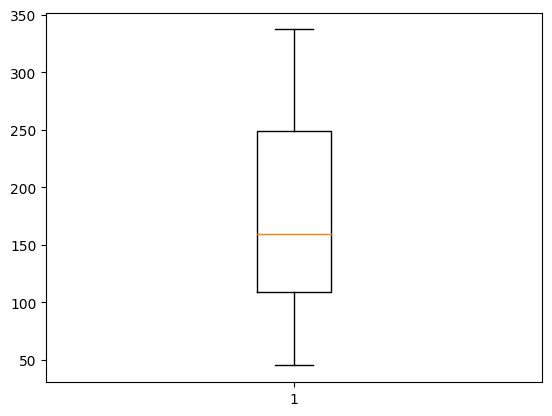

In [13]:
x = df['Assault']
plt.boxplot(x)

{'whiskers': [<matplotlib.lines.Line2D at 0x27b942fa7d0>,
 'caps': [<matplotlib.lines.Line2D at 0x27b942facb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27b942fa530>],
 'medians': [<matplotlib.lines.Line2D at 0x27b942fb1f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27b942fb490>],
 'means': []}

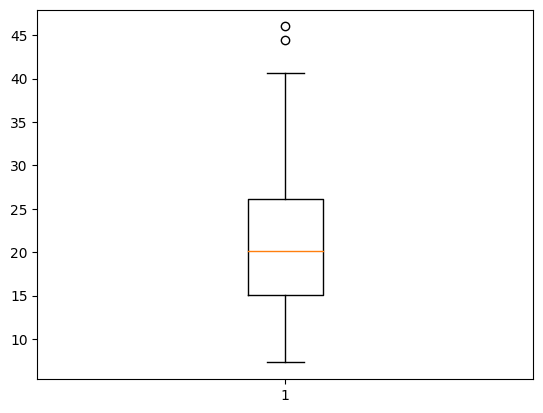

In [14]:
x = df['Rape']
plt.boxplot(x)

The above boxplots for murder and assault suggest no outliers, but there are two slight outliers for rape. Below, I'll sort the df by this column and see which states these outliers belong to.

In [15]:
df.sort_values('Rape').tail()

,State,Murder,Assault,UrbanPop,Rape
21,Michigan,12.1,255,74,35.1
5,Colorado,7.9,204,78,38.7
4,California,9.0,276,91,40.6
1,Alaska,10.0,263,48,44.5
27,Nevada,12.2,252,81,46.0


The outliers belong to Alaska and Nevada. The outliers do not seem significant and only affect one variable. For now, it's just useful to know that there are a couple of outliers, though they are small - if anything unusual comes up in the EDA below, I'll refer back to this knowledge, but these datapoints don't need to be cleaned or sorted.

# Initial Analysis - histograms

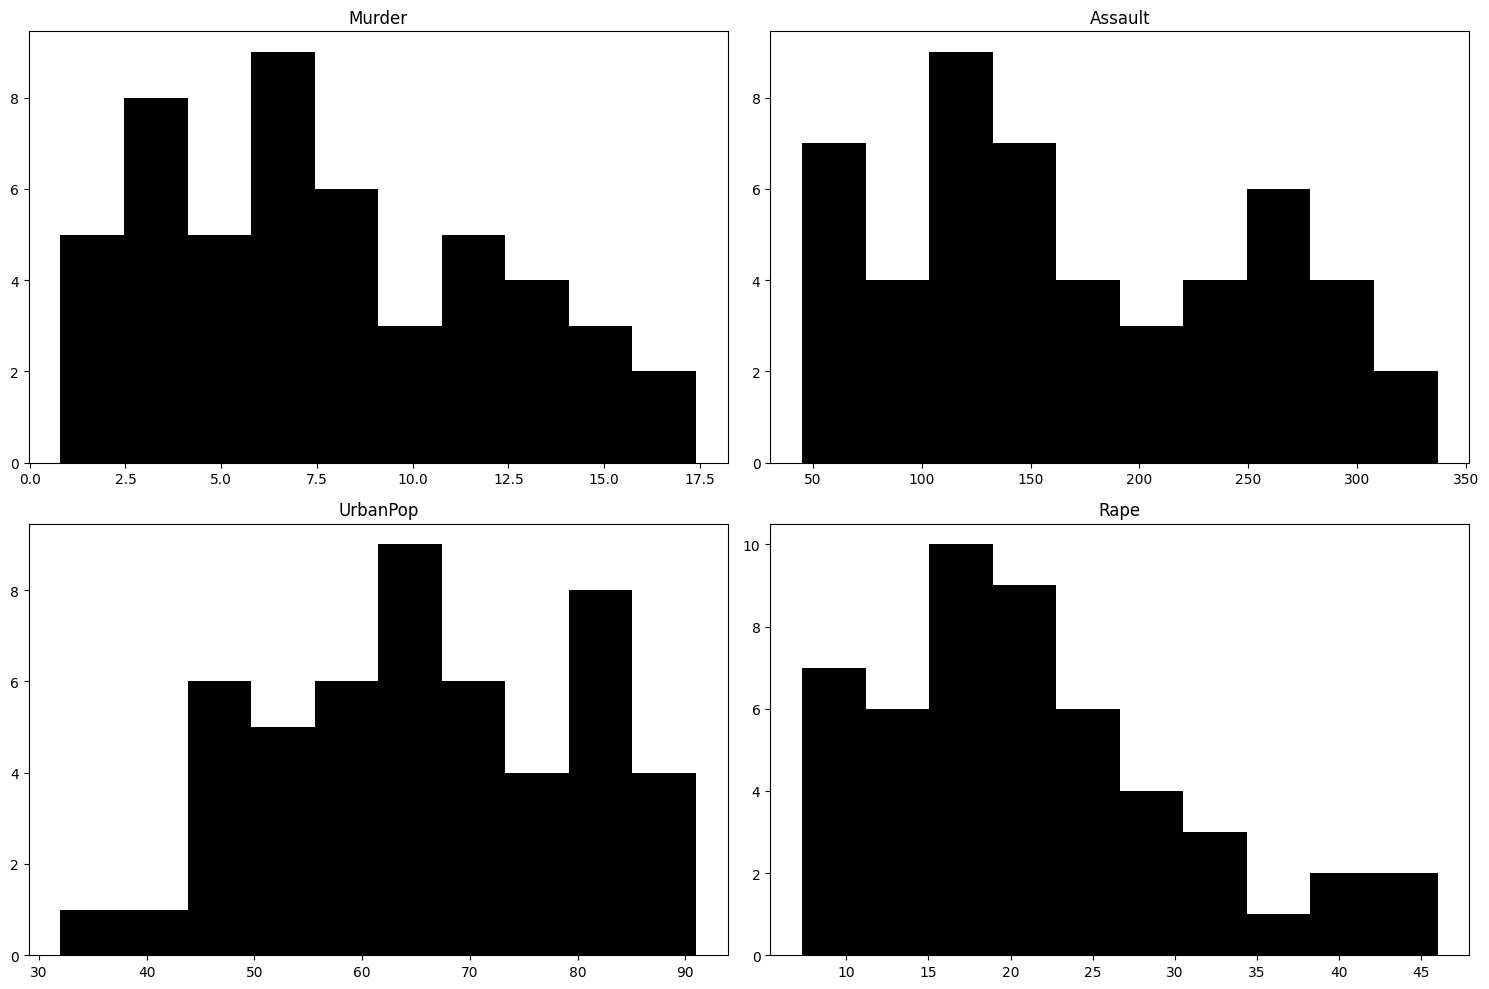

In [16]:
# Ploting histograms
histograms = df.hist(color='black', grid=False, figsize=(15, 10)) #This can also be done for each column individually by calling hist on that column
plt.tight_layout()
plt.show()


do a heckin analysis

# Cluster Analysis

## Dendrogram

For this dendrogram, I will create a dendrogram using both average and complete linkage to see which creates the more balanced dendrogram. I terns of the metric, I will be utisiling euclidian distance as it's the standard metric and generally accepted as the norm within statistics, at least as I was taught in my advanced statistics programme for my master's degree. 

In [17]:
# defining variables for clustering. I will be using the arrest rates for different crimes but won't include urban population as
# I'm just interested in clustering the arrest rate statistics
X = df.iloc[:, [1, 2, 4]].values.reshape(-1, 3)

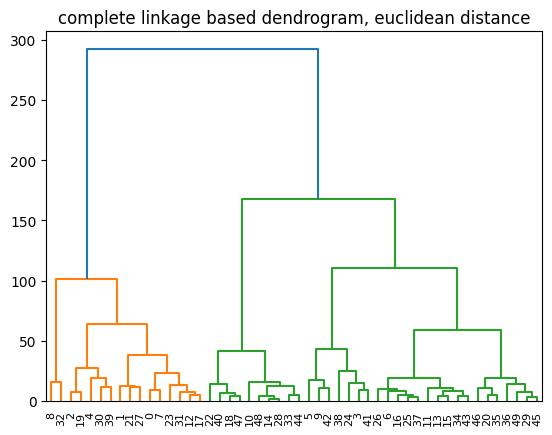

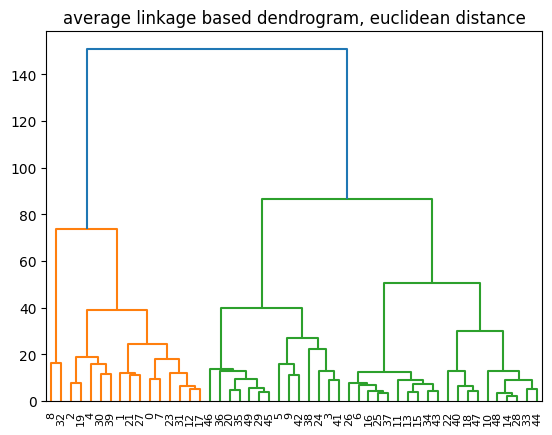

In [18]:
# defining function to create dendrogram based on method and metric arguments
def dend(method, metric = 'euclidean'):
    plt.title(f'{method} linkage based dendrogram, {metric} distance')
    dend = dendrogram(linkage(X, method = method, metric = metric))

# creating dendrograms for single and complete-linkage dendrograms based on either euclidean or cityblock distance
dend('complete')
plt.show()

dend('average')
plt.show()


What this means - something something arrest rates can be broadly broken into different groups...

note: euclidean is more different, both in terms of length of blue line and (more important) length of y axis.

## KMeans Clustering

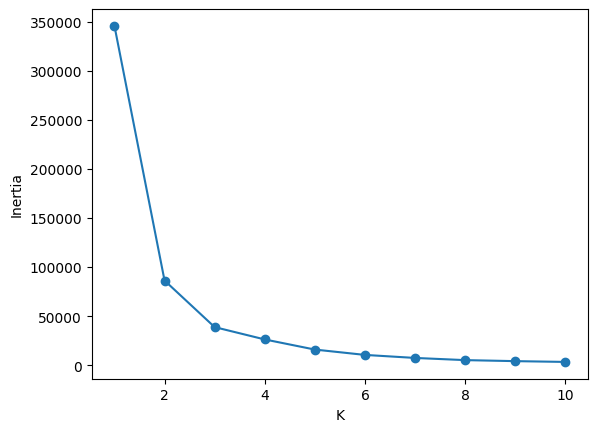

In [19]:
# determining value of k
def eval_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=r, n_init = 10)
    kmeans.fit(x)    
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=123):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1,max_k+1)]
    plt.plot(range(1,11), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()

elbow_Kmeans(X)

There are arguments to be made that we could define k as either 2 or 3. I will try both and assess which is better.

C:\Users\orlan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


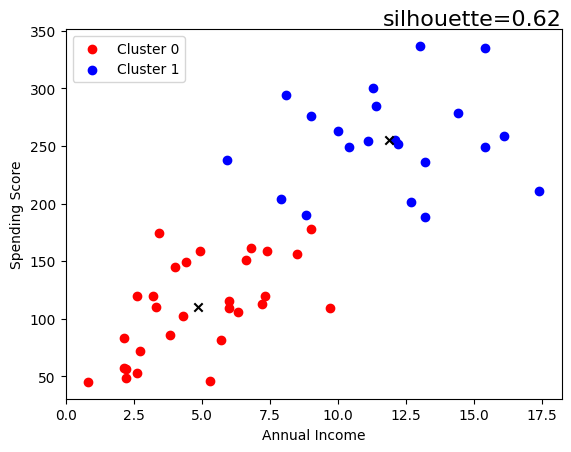

C:\Users\orlan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


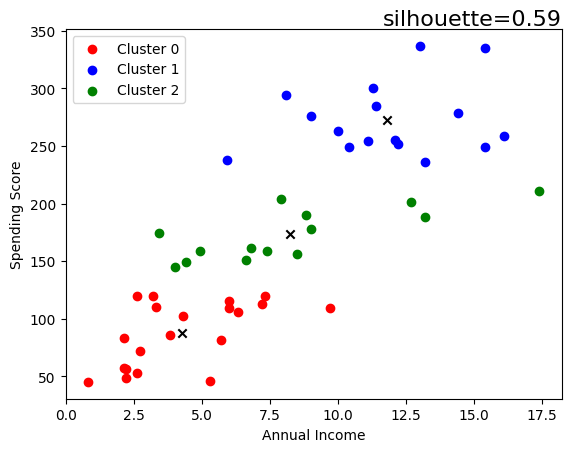

In [20]:
# creating cluster plots (including silhouette score)
def scatter_Kmeans(x, k, r=123):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=r)
    y_pred = kmeans.fit_predict(x)
    colours = 'rbgcmy'
    for c in range(k):
      plt.scatter(x[y_pred == c, 0], x[y_pred == c,1], c = colours[c], label = 'Cluster {}'.format(c))
      plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')
    
    score = round(silhouette_score(X, kmeans.labels_, metric='euclidean'),2)
    plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.legend()
    plt.show()

for k in range(2,4):
  scatter_Kmeans(X, k, r=0)
  

I would say that there is creater differenciation and less overlap with 2 clusters, so I would use the first diagramme. This is supported both by visual inspection, and the silhouette score (0.62), which is higher (though only marginally) than the silhouette score of the plot with 3 clusters (0.59).

Discuss more...

# PCA

C:\Users\orlan\AppData\Local\Temp\ipykernel_14280\2476380074.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrs = df.corr()


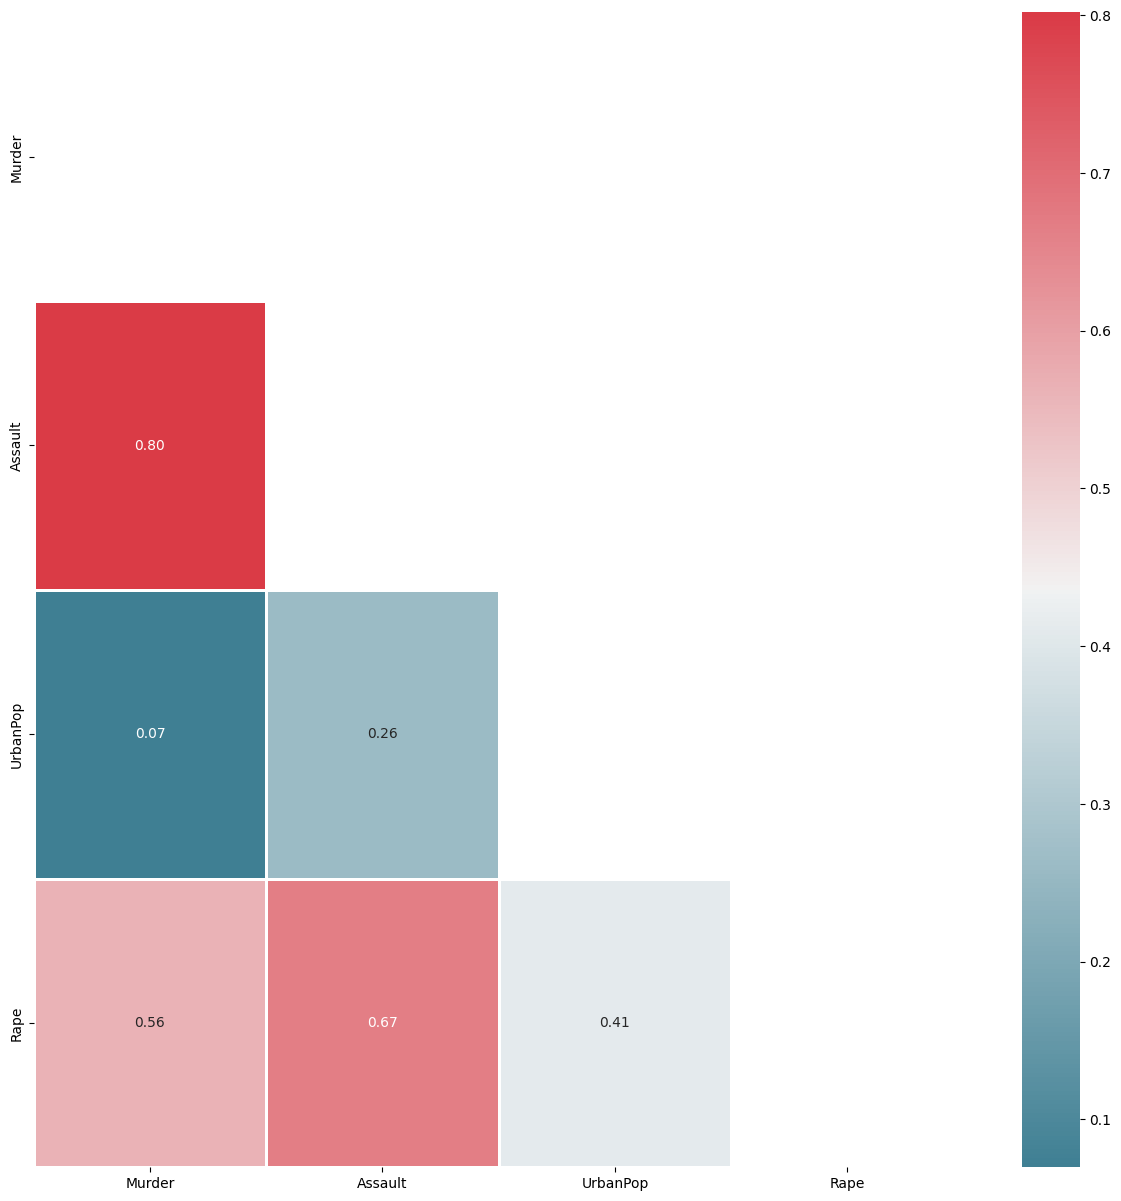

In [21]:
# choosing colours for heatmap
colormap = sns.diverging_palette(220, 10, as_cmap=True)

def corr_heatmap(df):
    
  # get correlations
  corrs = df.corr()

  # Plot figsize
  fig, ax = plt.subplots(figsize=(15, 15))

  # to mask mirrored side of heatmap
  dropSelf = np.zeros_like(corrs)
  dropSelf[np.triu_indices_from(dropSelf)] = True

  # Generate Heat Map, with annotations of the correlation strength as 2-decimal floats
  ax = sns.heatmap(corrs, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf, linewidth=2)

  plt.show()

corr_heatmap(df)

Make a comment, innit.

In [22]:
# re-defining X without reshaping
X = df.iloc[:, [1, 2, 4]]

In [23]:
# because we cannot scale data with string values, I will drop create a new df without the 'species' column. However, I am
# maintaining the original df in case I need it later.

# select and standardize features
X = StandardScaler().fit_transform(X)

# choose number of components to be generated
nr_comps = 3
pca = PCA(n_components=nr_comps)

# obtain components
principal_components = pca.fit_transform(X)

# transform the components into a pandas data frame
pca_df = pd.DataFrame(principal_components, index=df.index)

# ensuring new pca_df has been produced
pca_df.sample(5)

,0,1,2
48,-2.175679,-0.027674,0.129089
3,0.177776,0.328029,-0.071834
29,-0.280565,0.135989,0.001402
12,1.090540,0.282248,-0.294191
38,-1.321307,0.605841,-0.932482


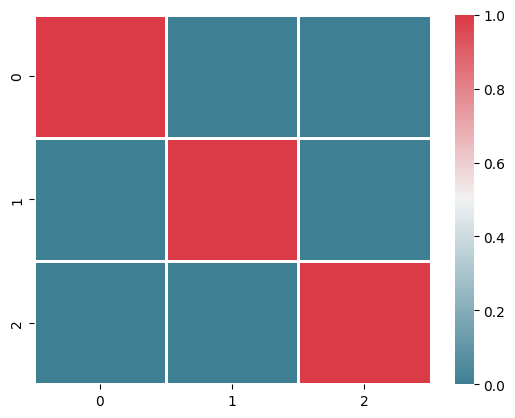

In [24]:
# creating heatmap to see if PC's are correlated
ax = sns.heatmap(pca_df.corr(), cmap=colormap,linewidth=1)
plt.show()

## they are not - ta daa

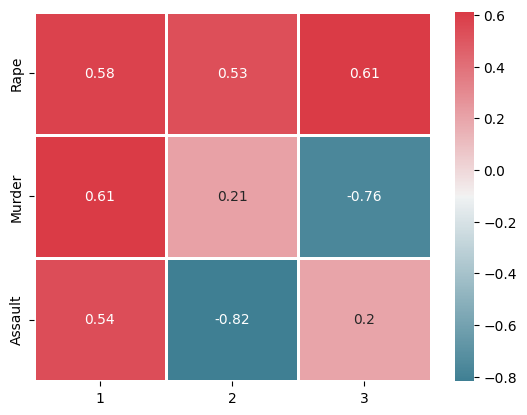

In [25]:
arrest_df = pd.DataFrame(df[['Rape', 'Murder', 'Assault']], index=df.index)

components = pd.DataFrame(pca.components_, columns=arrest_df.columns, index=range(1, nr_comps+1)).transpose()
ax = sns.heatmap(components,cmap=colormap,linewidth=1, annot = True)
plt.show()

do a heckin analysis

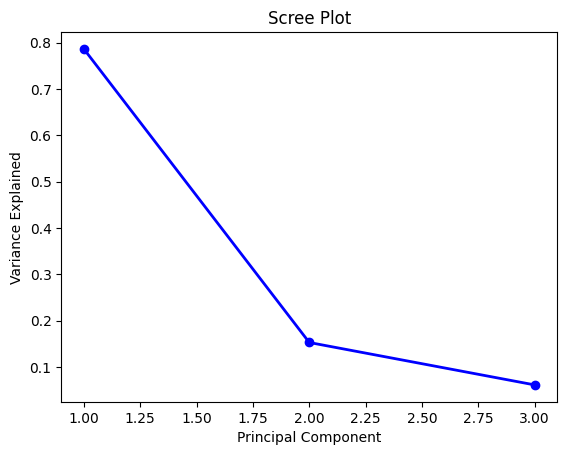

In [26]:
# creating a scree plot, referenced above, to determine how much variation each PC explains
pc_values = np.arange(pca.n_components_) + 1
plt.plot(pc_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

do another heckin' analysis

In [27]:

states = df['State']
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(pca_df)

# Groups - translate to readable names
clusters = pd.DataFrame()

group0_indices = np.argwhere(cluster_labels==0).transpose()[0]
group1_indices = np.argwhere(cluster_labels==1).transpose()[0]
#group2_indices = np.argwhere(cluster_labels==2).transpose()[0]

group0 = np.array(states)[group0_indices]
group1 = np.array(states)[group1_indices]
#group2 = np.array(states)[group2_indices]


#print("Group 0: {}\n\n".format([df.loc[X]["State"] for x in group0]))
#print("Group 1: {}\n\n".format([df.loc[X]["State"] for x in group1]))
#print("Group 2: {}\n\n".format([df.loc[x]["State"] for x in group2]))
print(group0)
print(group1)

['Arkansas' 'Connecticut' 'Delaware' 'Hawaii' 'Idaho' 'Indiana' 'Iowa'
 'Kansas' 'Kentucky' 'Maine' 'Massachusetts' 'Minnesota' 'Montana'
 'Nebraska' 'New Hampshire' 'New Jersey' 'North Dakota' 'Ohio' 'Oklahoma'
 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Dakota' 'Utah' 'Vermont'
 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']
['Alabama' 'Alaska' 'Arizona' 'California' 'Colorado' 'Florida' 'Georgia'
 'Illinois' 'Louisiana' 'Maryland' 'Michigan' 'Mississippi' 'Missouri'
 'Nevada' 'New Mexico' 'New York' 'North Carolina' 'South Carolina'
 'Tennessee' 'Texas']


C:\Users\orlan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
# now I need to make an new column codifying the states so that px.chloropleth can recognise the data. Below is a code
# which I will use to create the new column

code = {'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'}

Here, I want to ascertain if either of the PC's contain the same states, or if any states were not included for whatever reason.

In [51]:
# creating list of states in PC1
group0_list = []

for i in group0:
    group0_list.append(i)

# creating list of states in PC2
group1_list = []
for i in group1:
    group1_list.append(i)

# seeing if there is any overlap in state names between lists
check =  all(item in group0_list for item in group1_list)

if check is True:
    print("The list {} contains all elements of the list {}".format(group0_list, group1_list))    
else :
    print("No, there is no overlap.")
    
# calculating length of both lists combined. If length = 50, then all states have been included.
length = len(group1_list) + len(group0_list)
print(length)

No, there is no overlap.
50


In [52]:
# creating df's with groups listed and assigning code so that they can be mapped onto the chloropleth graph
df_group0 = pd.DataFrame(group0)
df_group0['Code_group0'] = df_group0[0].map(code)

df_group1 = pd.DataFrame(group1)
df_group1['Code_group1'] = df_group1[0].map(code)


In [54]:
# Visualising states included in PC1
fig = px.choropleth(df_group0,
                    locations='Code_group0',
                    #color='',
                    color_continuous_scale='spectral_r',
                    hover_name=df_group0[0],
                    locationmode='USA-states',
                    labels={'total_arrests':'Arrests per 1,000 People for Murder, Assault, and Rape'},
                    scope='usa')

fig.show()

In [53]:
# Visualising states included in PC2
fig = px.choropleth(df_group1,
                    locations='Code_group1',
                   # color='green',
                    #color_continuous_scale='oranges',
                    color_discrete_sequence = [[1, 'red']],
                    hover_name=df_group1[0],
                    locationmode='USA-states',
                    labels={'total_arrests':'Arrests per 1,000 People for Murder, Assault, and Rape'},
                    scope='usa')

fig.show()

Commentary that the states seem to be grouped broadly by North and South, meaning...